# Movie Industry Dataset Analysis

### By: Ethan Goldbeck, Vishal Narayanan, Aldo Peters, Yuxiang Wang

Objective: The movie industry has been one of the largest entertainment factors for audiences since movie making began. In the past 20 years, 3527 movies have released in the United States. With further advances in technology and movie making, this number should only increase as more ground breaking films are in production. When analyzing the success of a movie, many individuals, companies, and fans are often involved. This report aims to analyze the different variables that exist in our dataset and their impact on films in the past 20 years. 

In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

**Data Cleaning and structuring**

Before beginning our analysis, we started by cleaning and structuring our data in order to get a better understaning of the variables we wanted to analyze. The first step was filtering out our data to only include the last 20 years of movies, as our goal was to analyze the trends that occured in the movie industry in the past 20 years. Next, we proceeded by dropping a few columns such as writer, votes, and release, as they did not have as much impact on films as the other categories in our dataset. Finally, we divided both budget and gross amounts by $1,000,000 to get our numbers in the hundreds/tens unit for better analysis. The gross amount was then rounded up for all films. 

In [4]:
movies = pd.read_csv('movies.csv')
movies['released'] = pd.to_datetime(movies.released)
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
movies.drop(['writer','votes','released'], axis=1, inplace=True)
movies.drop(movies.index[:2202], inplace=True)
movies.dropna(inplace=True)
movies.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7000000,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,24611975,Fargo,R,98,8.1,William H. Macy,1996
2203,14000000,Dimension Films,USA,Wes Craven,Horror,103046663,Scream,R,111,7.2,Neve Campbell,1996
2204,19000000,Dimension Films,USA,Robert Rodriguez,Action,25753840,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75000000,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306169255,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14500000,Bazmark Films,USA,Baz Luhrmann,Drama,46351345,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996


In [6]:
movies =movies[~movies ['budget'].isin([0])]
movies['budget'].isnull()[2202:6821]
movies.dropna(inplace=True)  
movies.head(100)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7000000,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,24611975,Fargo,R,98,8.1,William H. Macy,1996
2203,14000000,Dimension Films,USA,Wes Craven,Horror,103046663,Scream,R,111,7.2,Neve Campbell,1996
2204,19000000,Dimension Films,USA,Robert Rodriguez,Action,25753840,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75000000,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306169255,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14500000,Bazmark Films,USA,Baz Luhrmann,Drama,46351345,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996
2207,36000000,TriStar Pictures,USA,Danny DeVito,Comedy,33084249,Matilda,PG,98,6.8,Danny DeVito,1996
2208,12000000,Universal Pictures,USA,Dennis Dugan,Comedy,38624000,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996
2209,3000000,NDF International,USA,Mira Nair,Crime,4109095,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996
2210,44000000,Astoria Films,USA,Barry Levinson,Crime,49100000,Sleepers,R,147,7.6,Robert De Niro,1996
2211,27000000,Miramax,USA,Anthony Minghella,Drama,78651430,The English Patient,R,162,7.4,Ralph Fiennes,1996


In [7]:
movies.budget = movies.budget/1000000
movies.gross = (movies.gross/1000000).round()
movies.head(100)

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year
2202,7.00,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,25.0,Fargo,R,98,8.1,William H. Macy,1996
2203,14.00,Dimension Films,USA,Wes Craven,Horror,103.0,Scream,R,111,7.2,Neve Campbell,1996
2204,19.00,Dimension Films,USA,Robert Rodriguez,Action,26.0,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996
2205,75.00,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306.0,Independence Day,PG-13,145,7.0,Will Smith,1996
2206,14.50,Bazmark Films,USA,Baz Luhrmann,Drama,46.0,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996
2207,36.00,TriStar Pictures,USA,Danny DeVito,Comedy,33.0,Matilda,PG,98,6.8,Danny DeVito,1996
2208,12.00,Universal Pictures,USA,Dennis Dugan,Comedy,39.0,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996
2209,3.00,NDF International,USA,Mira Nair,Crime,4.0,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996
2210,44.00,Astoria Films,USA,Barry Levinson,Crime,49.0,Sleepers,R,147,7.6,Robert De Niro,1996
2211,27.00,Miramax,USA,Anthony Minghella,Drama,79.0,The English Patient,R,162,7.4,Ralph Fiennes,1996


**What are the top Companies that have dominated the market in the past 20 years?**

In [15]:
moviecount = movies.groupby('company', as_index=False).agg({'name':'count', 'gross':'sum'}).sort_values(by='name', ascending=False).head(10)
moviecount

,company,name,gross
979,Universal Pictures,204,15645.0
997,Warner Bros.,196,16650.0
779,Paramount Pictures,151,12586.0
965,Twentieth Century Fox Film Corporation,140,12286.0
731,New Line Cinema,118,7597.0
310,Columbia Pictures,105,8784.0
311,Columbia Pictures Corporation,86,5437.0
382,DreamWorks,74,5406.0
996,Walt Disney Pictures,74,8639.0
954,Touchstone Pictures,67,4043.0


In [110]:
topcompanies = movies.groupby('company', as_index=False).agg({'name':'count', 'gross':'sum'}).sort_values(by='name', ascending=False).head(10)
topcompanies

,company,name,gross
979,Universal Pictures,204,15645.0
997,Warner Bros.,196,16650.0
779,Paramount Pictures,151,12586.0
965,Twentieth Century Fox Film Corporation,140,12286.0
731,New Line Cinema,118,7597.0
310,Columbia Pictures,105,8784.0
311,Columbia Pictures Corporation,86,5437.0
382,DreamWorks,74,5406.0
996,Walt Disney Pictures,74,8639.0
954,Touchstone Pictures,67,4043.0


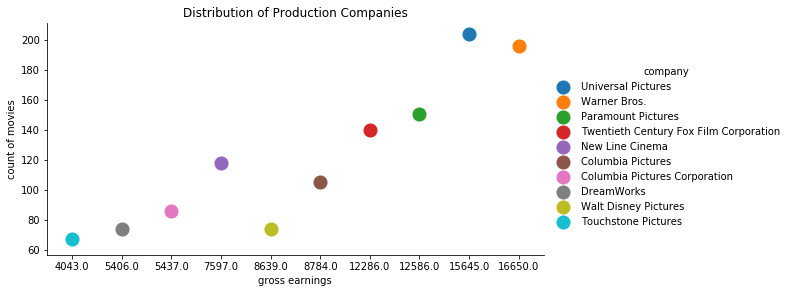

In [180]:
company = sns.catplot(x='gross',y='name',data=topcompanies,hue='company',kind='point',height=4,aspect=2,scale=1.6)
company.set(xlabel='gross earnings', ylabel='count of movies', title='Distribution of Production Companies')
company

Based on the analysis above, companies like Universal Pictures, Warner Bros, and Paramount pictures have dominated the market in the past 20 years in terms of both money and movies produced. The graph depicted shows where the top companies are in comparison to other companies, most notably Walt Disney Pictures, one of the largest entertainment conglomerates across the world. These companies are producing popular series such as Jurrasic Park/World (Universal studios), the Harry Potter & Batman series (Warner Bros.), and the Mission impossible series (Paramount). With the revenue and popularity that these movies have achieved, the companies are able to expand their operations beyond movie making by building theme parks and attractions, giving fans a true movie experience outside the cinema halls.

**Calculating return on investment for films**

In [9]:
ROI = 100*(movies.gross- movies.budget)/movies.budget
ROI

movies['ROI']=ROI

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year,ROI
2202,7.0,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,25.0,Fargo,R,98,8.1,William H. Macy,1996,257.142857
2203,14.0,Dimension Films,USA,Wes Craven,Horror,103.0,Scream,R,111,7.2,Neve Campbell,1996,635.714286
2204,19.0,Dimension Films,USA,Robert Rodriguez,Action,26.0,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996,36.842105
2205,75.0,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306.0,Independence Day,PG-13,145,7.0,Will Smith,1996,308.000000
2206,14.5,Bazmark Films,USA,Baz Luhrmann,Drama,46.0,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996,217.241379
2207,36.0,TriStar Pictures,USA,Danny DeVito,Comedy,33.0,Matilda,PG,98,6.8,Danny DeVito,1996,-8.333333
2208,12.0,Universal Pictures,USA,Dennis Dugan,Comedy,39.0,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996,225.000000
2209,3.0,NDF International,USA,Mira Nair,Crime,4.0,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996,33.333333
2210,44.0,Astoria Films,USA,Barry Levinson,Crime,49.0,Sleepers,R,147,7.6,Robert De Niro,1996,11.363636
2211,27.0,Miramax,USA,Anthony Minghella,Drama,79.0,The English Patient,R,162,7.4,Ralph Fiennes,1996,192.592593


Return on Investment for films was calculated by subtracting the gross amount from the budget amount, and then dividing it by budget. After finding the ROI percentages, a new ROI column was created which shows the return for all movies in our dataset.

**Who are the popular stars according to budget? Did a company's investments pay off?**

In [161]:
popularstar = movies.groupby('star', as_index=False).agg({'budget':'sum', 'ROI':'sum'}).sort_values(by='budget', ascending=False).head(10)
popularstar

,star,budget,ROI
612,Johnny Depp,2322.5,-51.091553
1187,Tom Cruise,1954.0,484.046320
908,Nicolas Cage,1935.0,-826.539693
1241,Will Smith,1848.1,897.882834
1190,Tom Hanks,1683.0,1083.239053
106,Ben Stiller,1656.0,1774.491558
12,Adam Sandler,1617.2,2286.601908
156,Bruce Willis,1603.3,250.412931
812,Matt Damon,1562.2,235.337131
295,Denzel Washington,1488.5,1175.686390


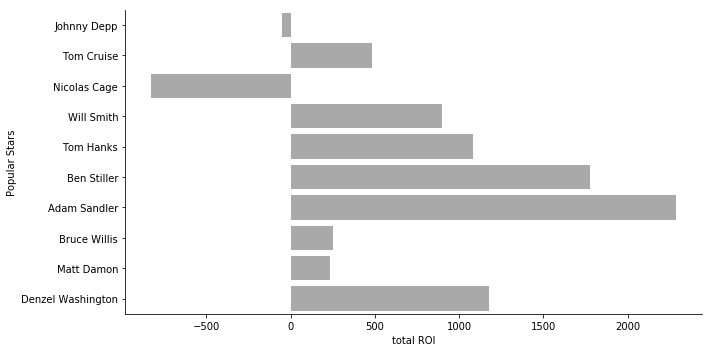

In [182]:
stars = sns.catplot(x='ROI',y='star', data=popularstar, kind='bar', color='darkgrey',aspect = 2,capsize=0)
stars.set(xlabel='total ROI', ylabel='Popular Stars')
stars

To determine if high budgeted stars had good returns on their films, we calculated the total budget that was allocated to them for all films. After doing so, we summed the total ROI as well for their movies. The analysis above shows the top 10 stars that had the highest budgets allocated to them. Surprisingly, popular stars like Jonnny Depp and Nicolas Cage had high budgets allocated to them, but had an overall negative return. All other stars proved to be profitable based on their overall budgets, with Adam Sandler leading the race. 

In [10]:
movies.loc[movies['ROI'] <=0,'MovieRank'] = 'Flop'
movies.loc[movies['ROI'] >=1,'MovieRank'] = 'Average'
movies.loc[movies['ROI'] >=20,'MovieRank'] = 'Above-Average'
movies.loc[movies['ROI'] >=50,'MovieRank'] = 'Hit'
movies.loc[movies['ROI'] >=100,'MovieRank'] = 'Super-Hit'
movies.loc[movies['ROI'] >=300,'MovieRank'] = 'Blockbuster'
movies

Rank = movies.iloc[:,[6,11,13]].groupby('MovieRank', as_index=False).agg({'name':'count'})
Rank

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,year,ROI,MovieRank
2202,7.00,PolyGram Filmed Entertainment,USA,Joel Coen,Crime,25.0,Fargo,R,98,8.1,William H. Macy,1996,257.142857,Super-Hit
2203,14.00,Dimension Films,USA,Wes Craven,Horror,103.0,Scream,R,111,7.2,Neve Campbell,1996,635.714286,Blockbuster
2204,19.00,Dimension Films,USA,Robert Rodriguez,Action,26.0,From Dusk Till Dawn,R,108,7.3,Harvey Keitel,1996,36.842105,Above-Average
2205,75.00,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,306.0,Independence Day,PG-13,145,7.0,Will Smith,1996,308.000000,Blockbuster
2206,14.50,Bazmark Films,USA,Baz Luhrmann,Drama,46.0,Romeo + Juliet,PG-13,120,6.8,Leonardo DiCaprio,1996,217.241379,Super-Hit
2207,36.00,TriStar Pictures,USA,Danny DeVito,Comedy,33.0,Matilda,PG,98,6.8,Danny DeVito,1996,-8.333333,Flop
2208,12.00,Universal Pictures,USA,Dennis Dugan,Comedy,39.0,Happy Gilmore,PG-13,92,7.0,Adam Sandler,1996,225.000000,Super-Hit
2209,3.00,NDF International,USA,Mira Nair,Crime,4.0,Kama Sutra: A Tale of Love,R,117,6.0,Naveen Andrews,1996,33.333333,Above-Average
2210,44.00,Astoria Films,USA,Barry Levinson,Crime,49.0,Sleepers,R,147,7.6,Robert De Niro,1996,11.363636,Average
2211,27.00,Miramax,USA,Anthony Minghella,Drama,79.0,The English Patient,R,162,7.4,Ralph Fiennes,1996,192.592593,Super-Hit


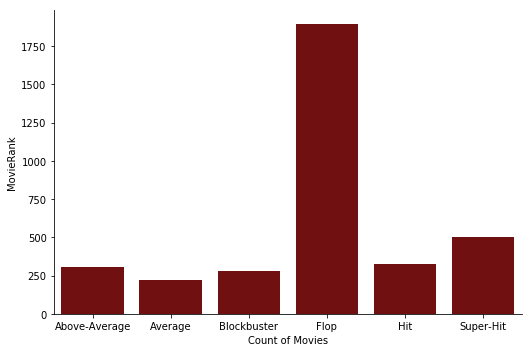

In [191]:
MovieRankplot = sns.catplot(x='MovieRank', y='name',data=Rank, color='maroon',kind='bar', aspect=1.5)
MovieRankplot.set(xlabel='Count of Movies', ylabel='MovieRank')
MovieRankplot

In [164]:
movies.iloc[:,[9,13]].groupby('MovieRank')['score'].mean()

MovieRank
Above-Average    6.500656
Average          6.467421
Blockbuster      6.673285
Flop             6.207928
Hit              6.496626
Super-Hit        6.585347
Name: score, dtype: float64

After finding the return on investment for each film, we categorized films based on their return and added a new column in our dataset. Movies that had a negative return were considered flops, whereas movies with positive returns were given the ranks (Average, Above Average, Hit, Super-Hit, and blockbuster). A new column was added at the end to show the Movie rank for each movie. The counts below display how many movies belong to each category. Surprisingly, 53% of movies in our dataset had negative returns and were considered flops by the box office. The most common positive rank that occurred was Super-Hit, with a total of 505 movies. The average score for these movie categories was also measured, showing a slight exponential increase as movies increase in ranks. 

**Did the highest budgeted films pay off for producers?**

In [75]:
moviebudget = movies.iloc[:,[0,5,6,12,13]].sort_values(by='budget', ascending=False).head(20)
moviebudget

,budget,gross,name,ROI,MovieRank
4631,300.0,309.0,Pirates of the Caribbean: At World's End,3.000000,Average
5293,260.0,201.0,Tangled,-22.692308,Flop
4637,258.0,337.0,Spider-Man 3,30.620155,Above-Average
6624,250.0,408.0,Captain America: Civil War,63.200000,Hit
6398,250.0,459.0,Avengers: Age of Ultron,83.600000,Hit
6619,250.0,330.0,Batman v Superman: Dawn of Justice,32.000000,Above-Average
5720,250.0,448.0,The Dark Knight Rises,79.200000,Hit
5065,250.0,302.0,Harry Potter and the Half-Blood Prince,20.800000,Above-Average
5502,250.0,241.0,Pirates of the Caribbean: On Stranger Tides,-3.600000,Flop
5757,250.0,73.0,John Carter,-70.800000,Flop


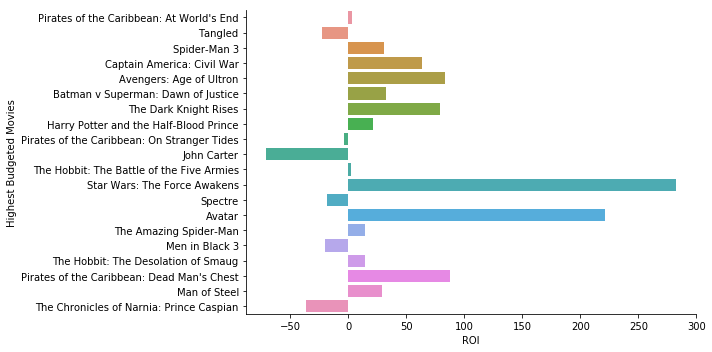

In [185]:
MovieBudgetplot = sns.catplot(x='ROI',y='name', data=moviebudget, kind='bar', aspect = 2,capsize=0)
MovieBudgetplot.set(xlabel='ROI', ylabel='Highest Budgeted Movies')
MovieBudgetplot

In [79]:
moviebudget.groupby('MovieRank').agg({'name':'count'})

,name
MovieRank,
Above-Average,4
Average,4
Flop,6
Hit,4
Super-Hit,2


To determine if the highest budgeted films paid off for producers, we found the top 20 films with the highest budget, and measured their returns. The graph above shows that having a high budget doesn't always pay off for producers. For example, Pirates of the Carribean was one of the most popular film series produced by Walt Disney, however as the budgets increased per movie, the company was unable to generate a decent profit on their last 2 films, with the most recent one being a box office flop. Movies towards the end of our list, such as Avatar and Star wars, became Super-Hits at the box office and was well received by the audience. The MovieRanks for the high budgeted movies are shown above, and suprisingly there were more box office flops than any other category. 